<a href="https://colab.research.google.com/github/Emily-Hsu2004/edu-data-mining-/blob/main/%E7%B7%B4%E7%BF%92/week3-%E8%AA%B2%E5%A0%82%E7%B7%B4%E7%BF%921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課堂作業1
力宇平台資料-力宇教育-時數報表113.08.01-113.12.31
https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing

## 檔案下載

### 獲得google 權限

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

### 加載到colab

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
lu_gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing')

In [3]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
lu_sheets = lu_gsheets.worksheet('金寧國中').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df_0 = pd.DataFrame(lu_sheets[1:], columns=lu_sheets[0])
# 取得最前面的5筆資料
df_0.head()

,學校名稱,年級,帳號,座號,學生姓名,班級,科目,指派測驗平均成績,老師指派測驗數,老師指派測驗完成數,老師指派測驗題目數,自我練習平均成績,自我測驗卷數,自我練習題目數,完成老師指派影片數,自我點播影片數,累積影片總時數
0,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-自然(113建立),自然,0,0,0,0,0,0,0,0,0,00:00:00
1,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-國文(113建立),國語文,0,0,0,55,0,0,0,0,0,00:00:00
2,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-社會(113建立),社會,0,0,0,0,0,0,0,0,0,00:00:00
3,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-英語文(113建立),英語文,0,0,0,0,0,0,0,0,0,00:00:00
4,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-數學(113建立),數學,70,1,1,20,70,0,0,0,0,00:00:00


## 初步檢查

In [4]:
type(df_0['老師指派測驗題目數'][3])

str

### 轉成數字格式

In [5]:
cols = [
    '指派測驗平均成績', '老師指派測驗完成數', '老師指派測驗題目數',
    '自我練習平均成績', '自我測驗卷數', '自我練習題目數',
    '完成老師指派影片數', '自我點播影片數','年級'
]

df_0[cols] = df_0[cols].apply(pd.to_numeric, errors="coerce")


## 資料觀察

In [6]:
print(df_0.columns)

Index(['學校名稱', '年級', '帳號', '座號', '學生姓名', '班級', '科目', '指派測驗平均成績', '老師指派測驗數',
       '老師指派測驗完成數', '老師指派測驗題目數', '自我練習平均成績', '自我測驗卷數', '自我練習題目數', '完成老師指派影片數',
       '自我點播影片數', '累積影片總時數'],
      dtype='object')


先考慮'老師指派測驗數'以及'老師指派測驗完成數'在各科各班級的關係，透過這個來了解平台使用狀況。

## 作圖

In [7]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-03-19 02:27:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 209.85.200.113, 209.85.200.102, 209.85.200.139, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-03-19 02:27:24--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  98.1MB/s    in 0.2s    

2025-03-19 02:27:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 讀取
df_7=df_0[df_0["年級"].isin([7])]

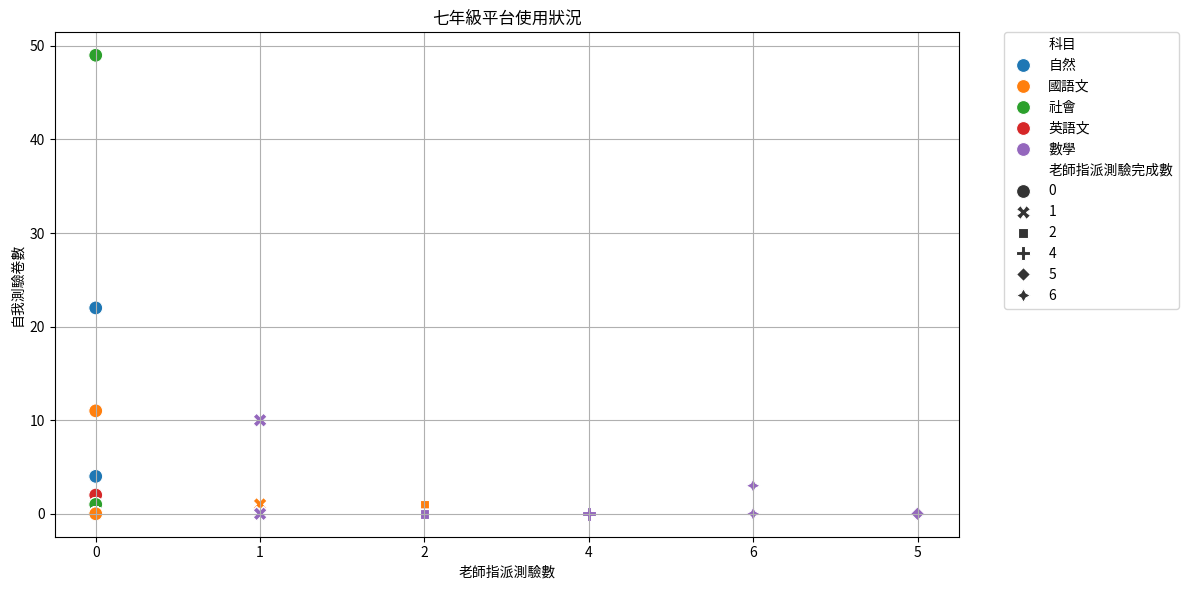

In [10]:
# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("七年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

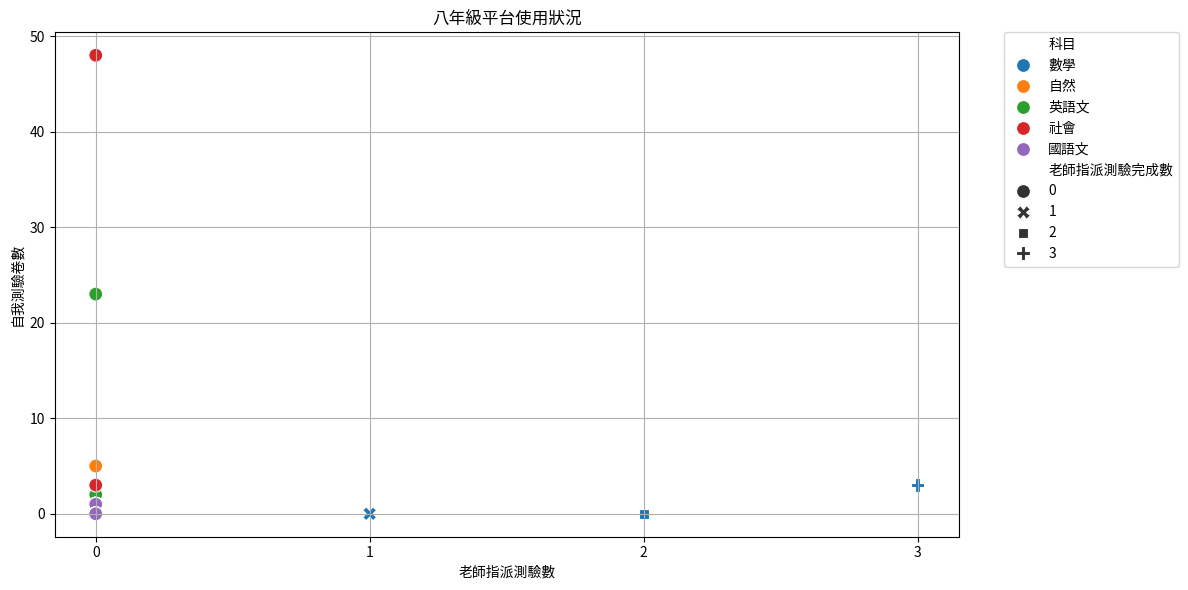

In [11]:
# 讀取
df_8=df_0[df_0["年級"].isin([8])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_8,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("八年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

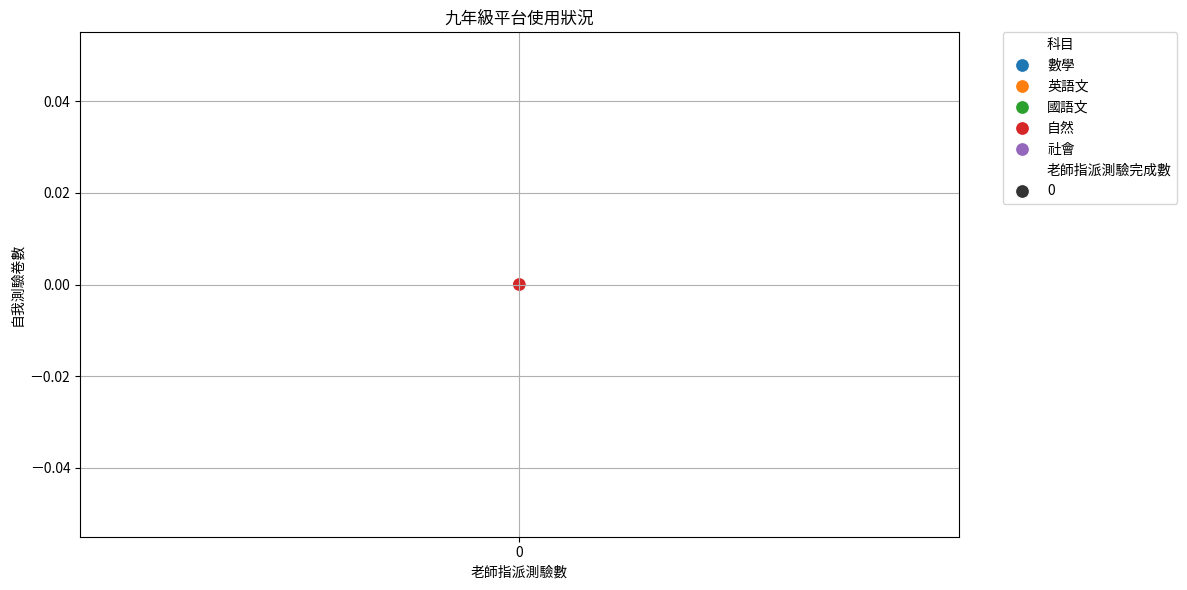

In [12]:
# 讀取
df_9=df_0[df_0["年級"].isin([9])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_9,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("九年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

可以看出  
- 七年級只有數學科與國語文老師在使用平台，部分學生會使用平台自主學習
- 八年級只有數學科在使用平台，部分學生會使用平台自主學習
- 九年級無老師與學生使用平台  

因此單獨分離出這兩科看各班使用狀況。  
由於'自我練習平均成績'='指派測驗平均成績'，因此老師沒用此平台出測驗的話，無法判讀學生學習成效，故不會再對此部分進行深入討論。

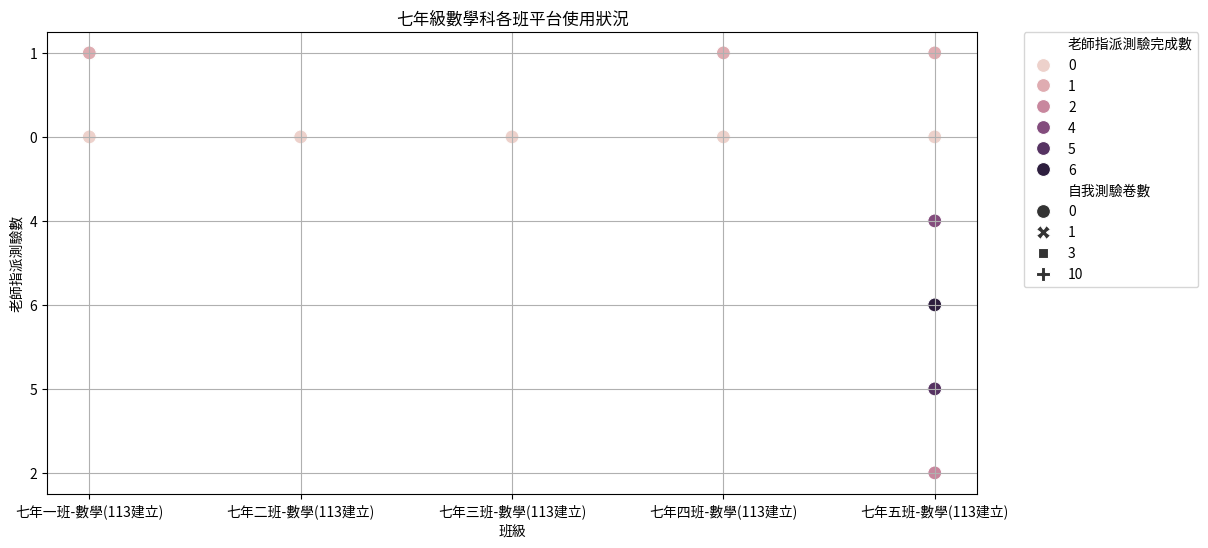

In [13]:
# 讀取
df_7_c_m=df_7[df_7["科目"].isin(["數學"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7_c_m,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)

plt.title("七年級數學科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

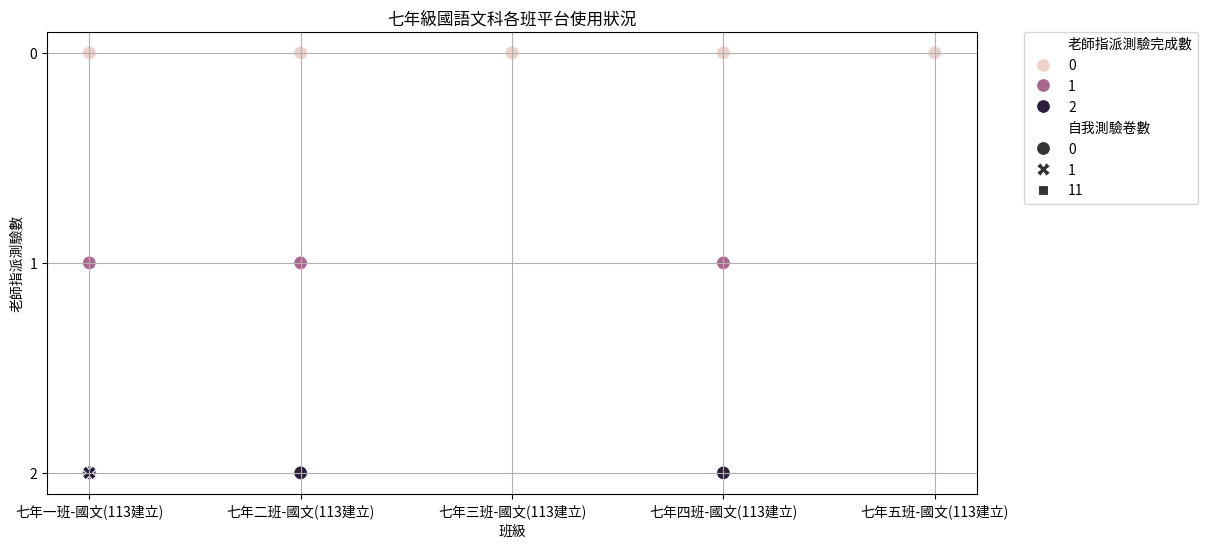

In [14]:
# 讀取
df_7_c_c=df_7[df_7["科目"].isin(["國語文"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7_c_c,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)
plt.title("七年級國語文科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

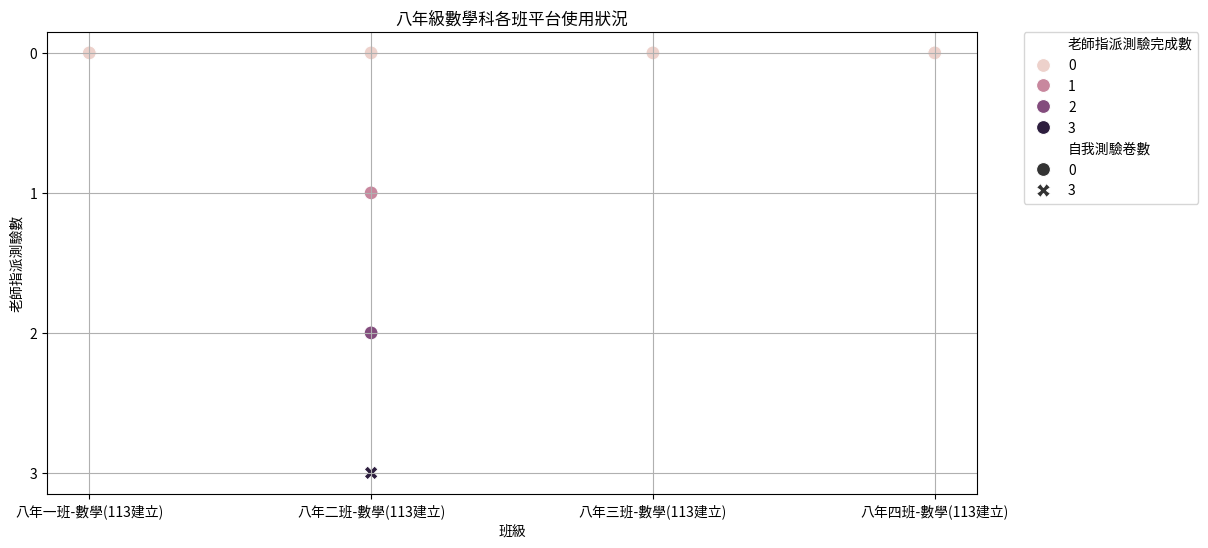

In [15]:
# 讀取
df_8_c_m=df_8[df_8["科目"].isin(["數學"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_8_c_m,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)
plt.title("八年級數學科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

可以看出有在使用的是

數學科：701 704 705 802  
國語文：701 702 704

In [16]:
df_7_c_m_s=df_7_c_m[df_7_c_m["班級"].isin(["七年一班-數學(113建立)","七年四班-數學(113建立)","七年五班-數學(113建立)"])]
df_7_c_c_s=df_7_c_c[df_7_c_c["班級"].isin(["七年一班-國文(113建立)","七年四班-國文(113建立)","七年二班-國文(113建立)"])]
df_8_c_m_s=df_8_c_m[df_8_c_m["班級"].isin(["八年二班-數學(113建立)"])]
df_78_cm_s=pd.concat([df_7_c_m_s,df_8_c_m_s,df_7_c_c_s])

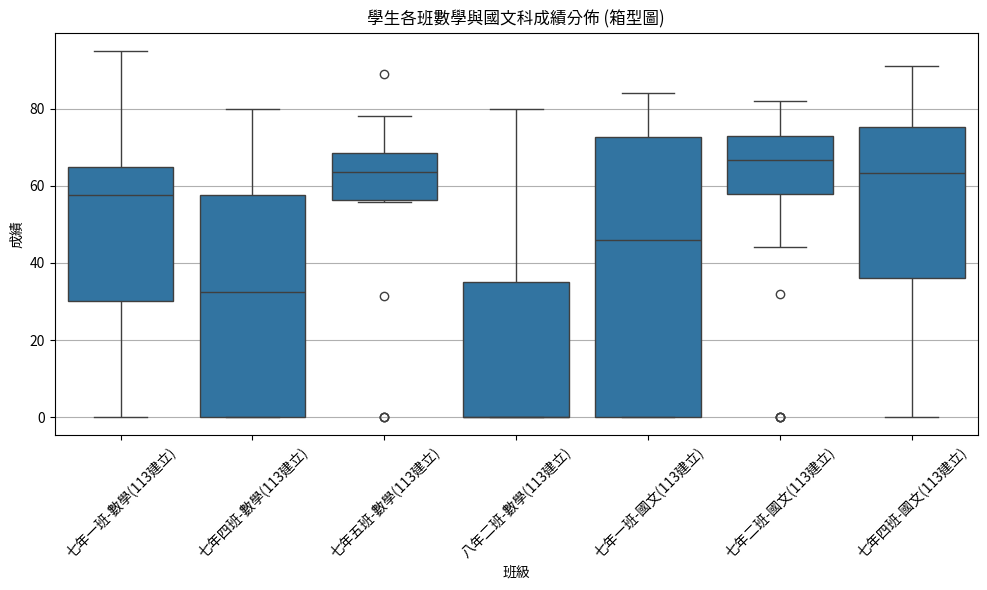

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_78_cm_s)
plt.title("學生各班數學與國文科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

可以觀察到部分班級成績分布出現異常，回看資料發現，有些老師只給部分學生指派任務，因此再次過濾出老師有指派任務的學生來進行進一步的觀察。

In [18]:
df_78_cm_s_0 = df_78_cm_s[df_78_cm_s["老師指派測驗數"] != "0"]
df_78_cm_s_1 = df_78_cm_s[df_78_cm_s["老師指派測驗數"] == "0"]
titles = ["原始班級人數", "各班無指派測驗人數", "各班有指派測驗人數"]
dfs = [df_78_cm_s, df_78_cm_s_1, df_78_cm_s_0]

for title, df in zip(titles, dfs):
    print(f"{title}：\n{df['班級'].value_counts()}\n")

原始班級人數：
班級
七年二班-國文(113建立)    24
八年二班-數學(113建立)    23
七年一班-數學(113建立)    22
七年五班-數學(113建立)    22
七年四班-數學(113建立)    22
七年一班-國文(113建立)    22
七年四班-國文(113建立)    22
Name: count, dtype: int64

各班無指派測驗人數：
班級
八年二班-數學(113建立)    10
七年一班-國文(113建立)    10
七年四班-數學(113建立)     8
七年一班-數學(113建立)     5
七年二班-國文(113建立)     4
七年五班-數學(113建立)     3
七年四班-國文(113建立)     3
Name: count, dtype: int64

各班有指派測驗人數：
班級
七年二班-國文(113建立)    20
七年四班-國文(113建立)    19
七年五班-數學(113建立)    19
七年一班-數學(113建立)    17
七年四班-數學(113建立)    14
八年二班-數學(113建立)    13
七年一班-國文(113建立)    12
Name: count, dtype: int64



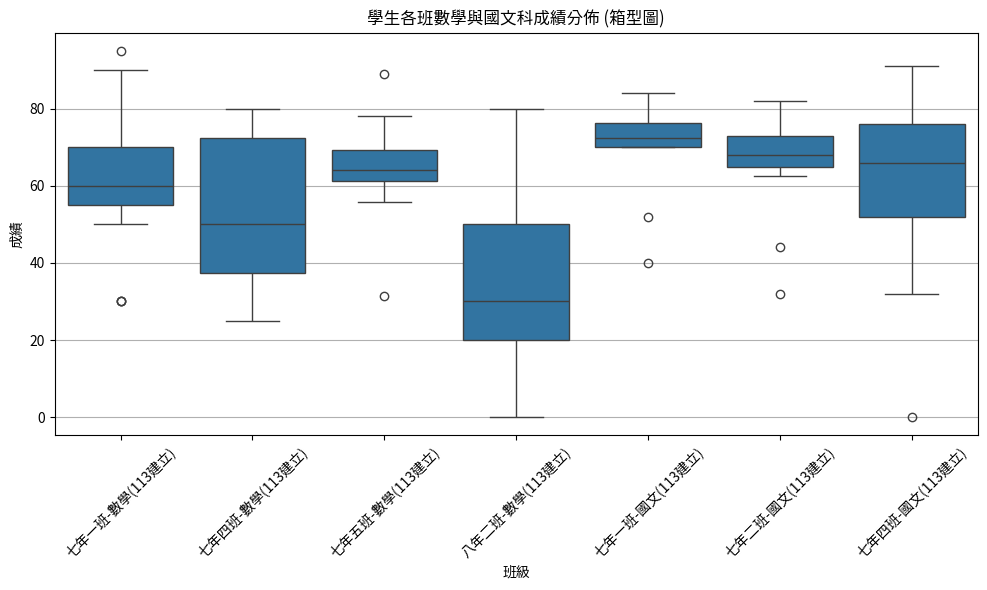

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_78_cm_s_0)
plt.title("學生各班數學與國文科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

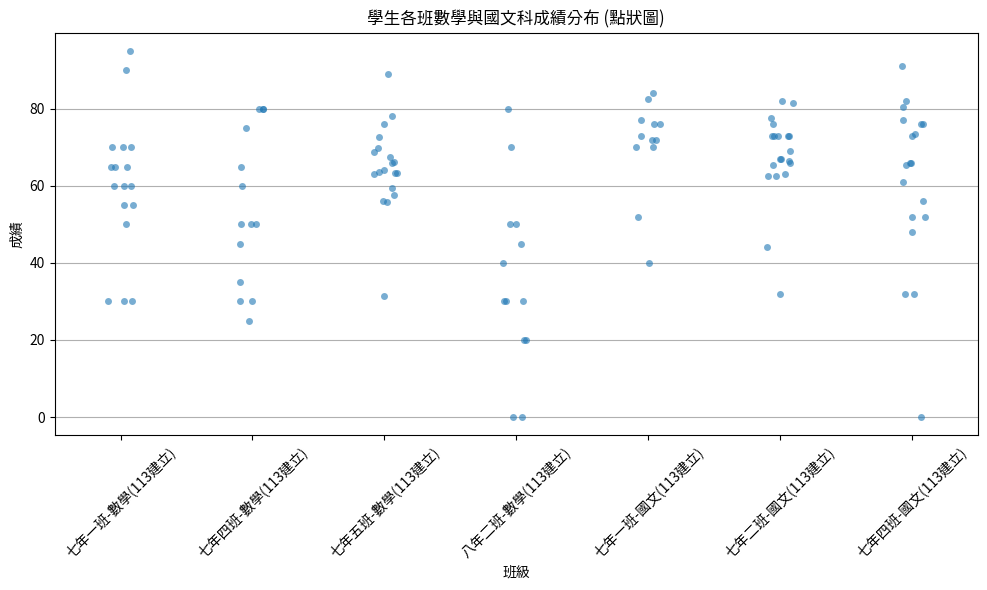

In [42]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="班級", y="指派測驗平均成績", data=df_78_cm_s_0, jitter=True, alpha=0.6)
plt.title("學生各班數學與國文科成績分布 (點狀圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


- 701 math：有17位被分配平台任務，移除5人，共22人  
成績分布較為集中，有明顯離群的高分以及低分，高低分有明顯的落差。
- 704 math：有14位被分配平台任務，移除8人，共22人  
分佈較分散，沒有特別的離群值出現，中位數低於其他同為7年級數學的兩班。
- 705 math：有19位被分配平台任務，移除3人，共22人  
成績分布較為集中，有明顯離群的高分以及低分，排除離群值後平台使用學生成績相近。
- 802 math：有13位被分配平台任務，移除10人，共23人  
分佈較分散，沒有特別的離群值出現，中位數低，且高低分落差大。
- 701 ch.：有12位被分配平台任務，移除10人，共22人
成績分布較為集中，有明顯離群的低分，排除離群值後平台使用學生成績相近。
- 702 ch.：有20位被分配平台任務，移除4人，共24人  
成績分布較為集中，有明顯離群的低分，排除離群值後平台使用學生成績相近。
- 704 ch.：有19位被分配平台任務，移除3人，共22人  
分佈較分散，有明顯離群的低分且高低分落差大。

In [36]:
df_78_cm_s_0_a=df_78_cm_s_0.drop(columns=['學校名稱', '年級', '座號', '學生姓名', '科目', '自我練習平均成績', '累積影片總時數'])
dummies = pd.get_dummies(df_78_cm_s_0_a[["班級"]]).astype(int)
df= pd.concat([df_78_cm_s_0_a, dummies], axis=1)
df_1=df.drop(columns=['班級',"帳號"])
df_1.head()

,指派測驗平均成績,老師指派測驗數,老師指派測驗完成數,老師指派測驗題目數,自我測驗卷數,自我練習題目數,完成老師指派影片數,自我點播影片數,班級_七年一班-國文(113建立),班級_七年一班-數學(113建立),班級_七年二班-國文(113建立),班級_七年五班-數學(113建立),班級_七年四班-國文(113建立),班級_七年四班-數學(113建立),班級_八年二班-數學(113建立)
4,70.0,1,1,20,0,0,0,0,0,1,0,0,0,0,0
5,65.0,1,1,20,0,0,0,0,0,1,0,0,0,0,0
12,30.0,1,1,20,10,115,0,5,0,1,0,0,0,0,0
19,55.0,1,1,20,0,0,0,2,0,1,0,0,0,0,0
20,60.0,1,1,20,0,0,0,0,0,1,0,0,0,0,0


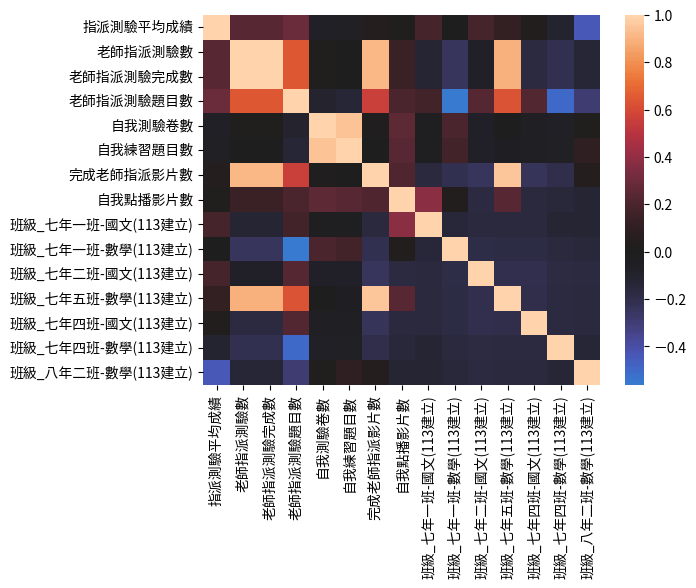

In [21]:
sns.heatmap(df_1.corr(),
    xticklabels=df_1.corr().columns.values,
    yticklabels=df_1.corr().columns.values,center=0)
df_1.corr().to_excel("1.xlsx")

老師指派測驗數與老師指派測驗題目數 以及 自我練習題目數與自我測驗卷數有強相關性，因此為了減少欄位進行取捨。

In [37]:
df_1=df.drop(columns=['班級',"帳號","老師指派測驗完成數",'自我練習題目數'])
df_701_c=df_1.drop(columns=["班級_七年一班-數學(113建立)","班級_七年二班-國文(113建立)",	"班級_七年五班-數學(113建立)"	,"班級_七年四班-國文(113建立)","班級_七年四班-數學(113建立)",	"班級_八年二班-數學(113建立)"])
df_701_m=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年二班-國文(113建立)",	"班級_七年五班-數學(113建立)"	,"班級_七年四班-國文(113建立)","班級_七年四班-數學(113建立)",	"班級_八年二班-數學(113建立)"])
df_702_c=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年一班-數學(113建立)","班級_七年五班-數學(113建立)"	,"班級_七年四班-國文(113建立)","班級_七年四班-數學(113建立)",	"班級_八年二班-數學(113建立)"])
df_705_m=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年一班-數學(113建立)","班級_七年二班-國文(113建立)",	"班級_七年四班-國文(113建立)","班級_七年四班-數學(113建立)",	"班級_八年二班-數學(113建立)"])
df_704_c=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年一班-數學(113建立)","班級_七年二班-國文(113建立)",	"班級_七年五班-數學(113建立)"	,"班級_七年四班-數學(113建立)",	"班級_八年二班-數學(113建立)"])
df_704_m=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年一班-數學(113建立)","班級_七年二班-國文(113建立)",	"班級_七年五班-數學(113建立)"	,"班級_七年四班-國文(113建立)",	"班級_八年二班-數學(113建立)"])
df_802_m=df_1.drop(columns=["班級_七年一班-國文(113建立)","班級_七年一班-數學(113建立)","班級_七年二班-國文(113建立)",	"班級_七年五班-數學(113建立)"	,"班級_七年四班-國文(113建立)","班級_七年四班-數學(113建立)"])
df_701_c=df_701_c[df_701_c['班級_七年一班-國文(113建立)']==1]
df_701_m=df_701_m[df_701_m["班級_七年一班-數學(113建立)"]==1]
df_702_c = df_702_c[df_702_c["班級_七年二班-國文(113建立)"] == 1]
df_705_m = df_705_m[df_705_m["班級_七年五班-數學(113建立)"] == 1]
df_704_c = df_704_c[df_704_c["班級_七年四班-國文(113建立)"] == 1]
df_704_m = df_704_m[df_704_m["班級_七年四班-數學(113建立)"] == 1]
df_802_m = df_802_m[df_802_m["班級_八年二班-數學(113建立)"] == 1]

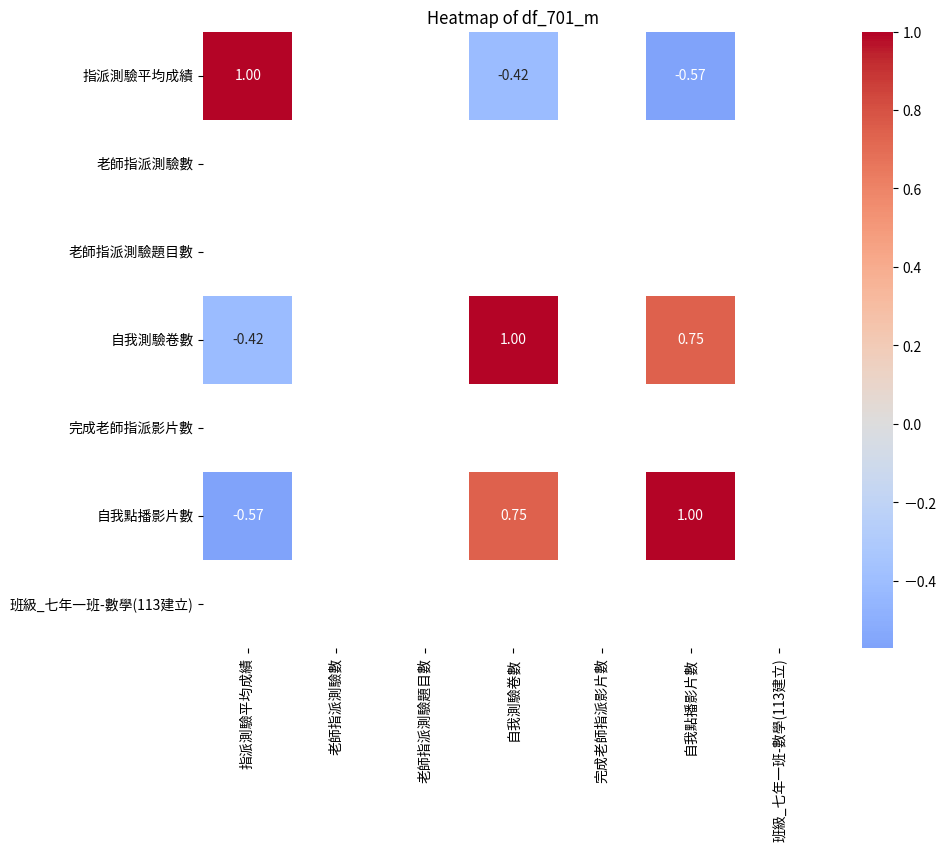

df_701_m 資料筆數: 17

---------------------------------------------------------------------------------------------------------------


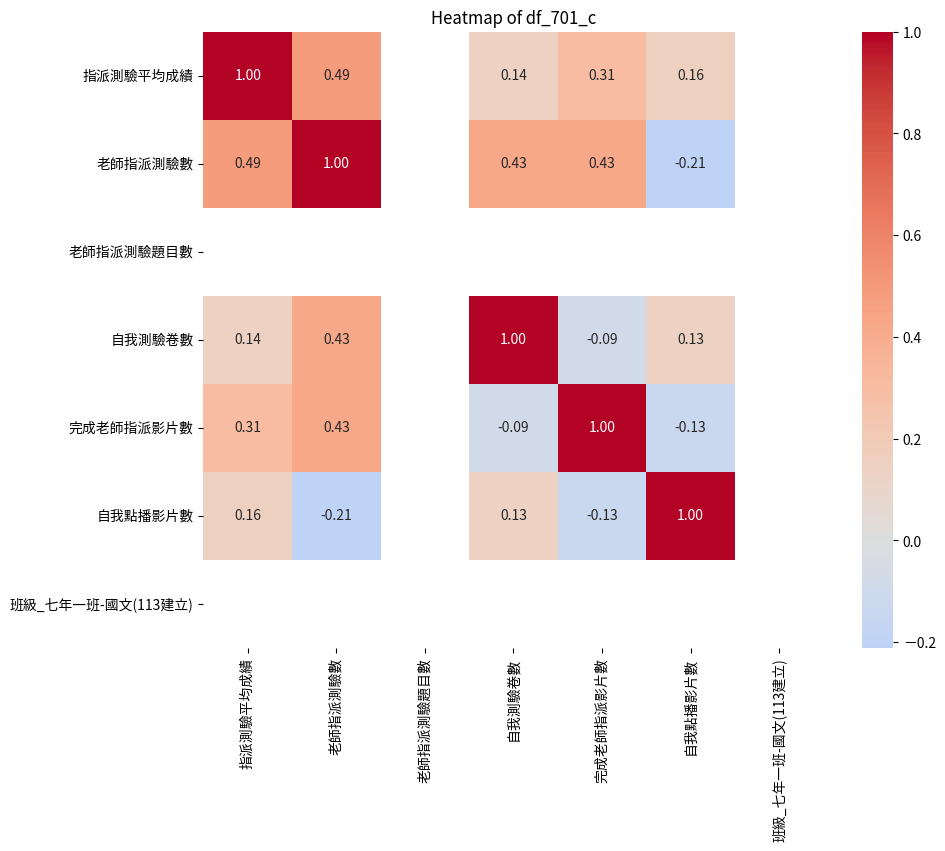

df_701_c 資料筆數: 12

---------------------------------------------------------------------------------------------------------------


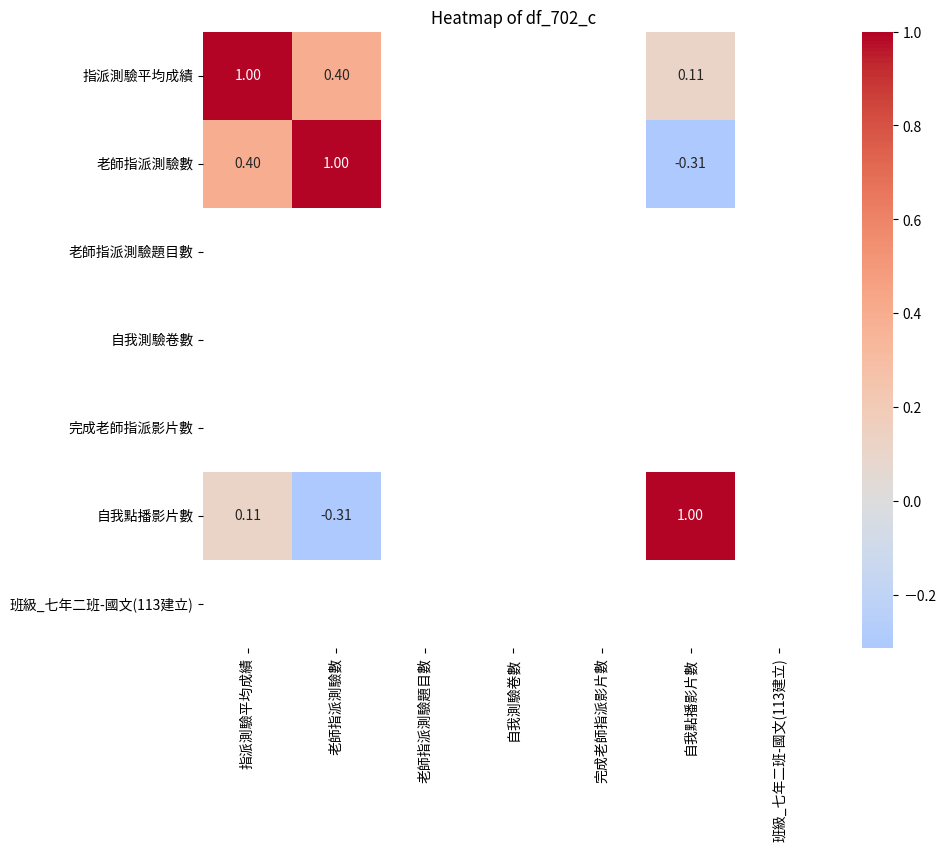

df_702_c 資料筆數: 20

---------------------------------------------------------------------------------------------------------------


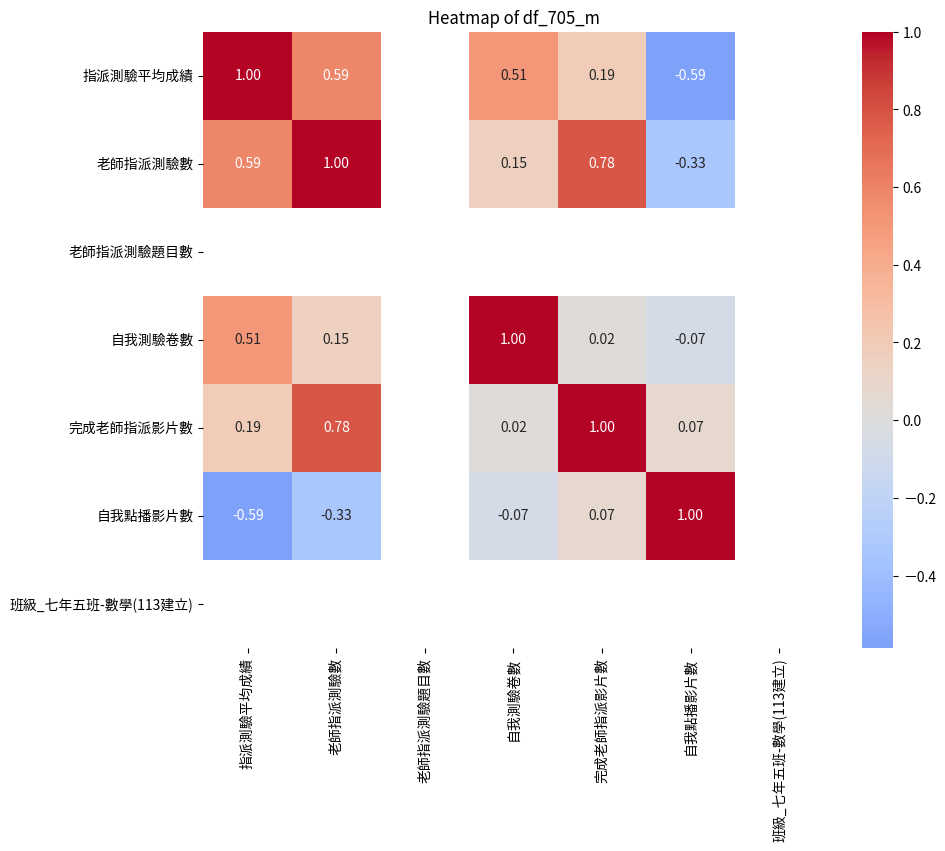

df_705_m 資料筆數: 19

---------------------------------------------------------------------------------------------------------------


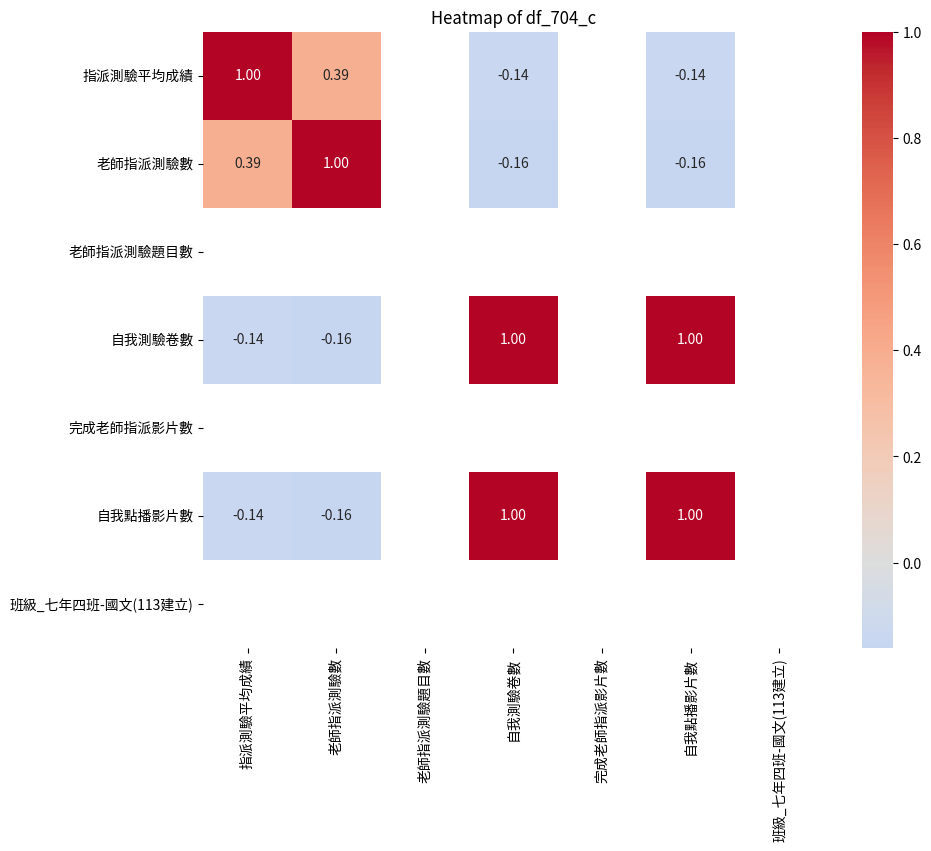

df_704_c 資料筆數: 19

---------------------------------------------------------------------------------------------------------------


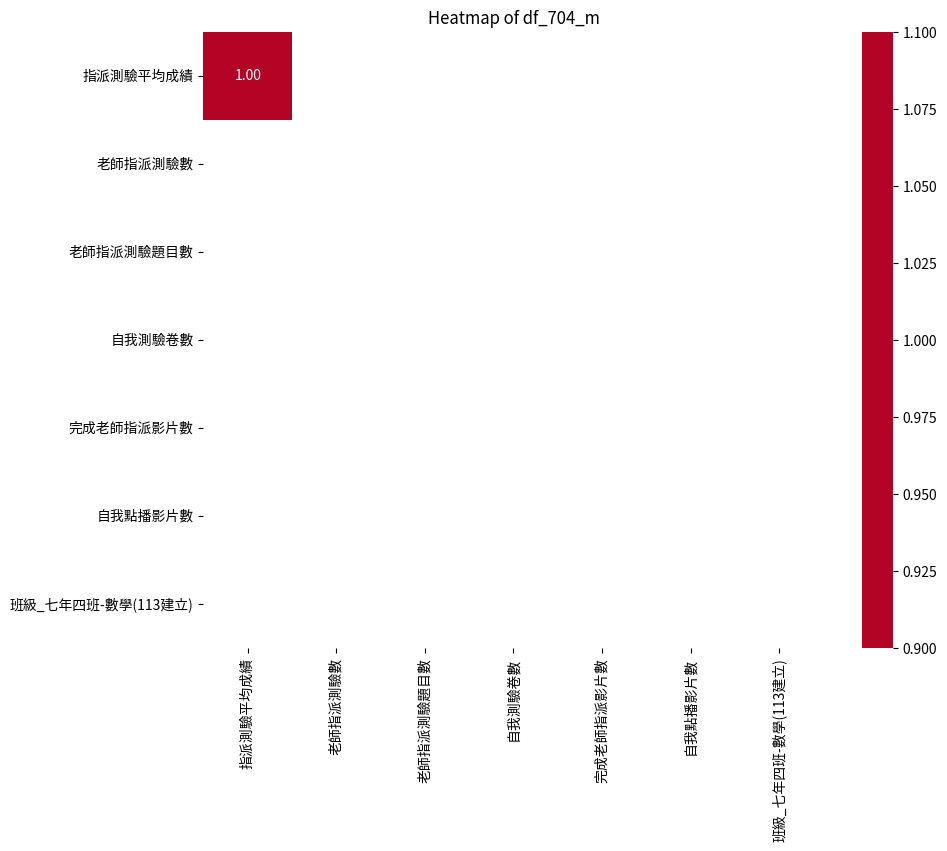

df_704_m 資料筆數: 14

---------------------------------------------------------------------------------------------------------------


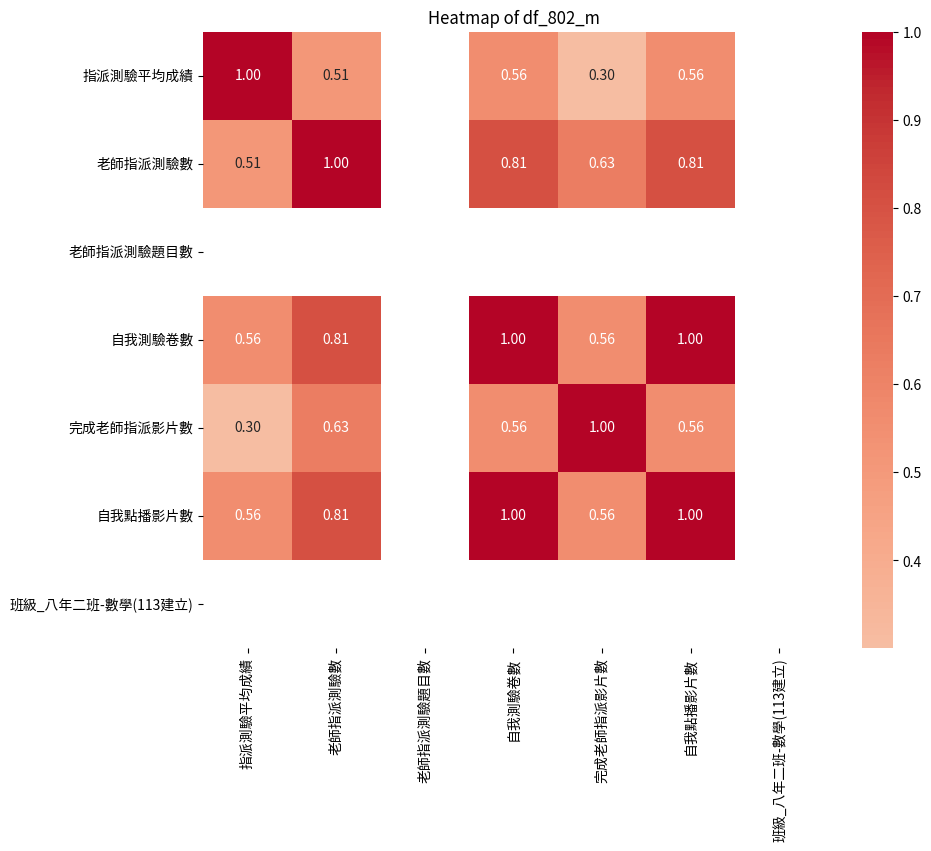

df_802_m 資料筆數: 13

---------------------------------------------------------------------------------------------------------------


In [38]:
# 定義 DataFrame 名稱的列表
df_list = [df_701_m, df_701_c, df_702_c, df_705_m, df_704_c, df_704_m, df_802_m]
df_names = ["df_701_m", "df_701_c", "df_702_c", "df_705_m", "df_704_c", "df_704_m", "df_802_m"]

# 依序處理每個 DataFrame
for df, name in zip(df_list, df_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(),
                xticklabels=df.corr().columns.values,
                yticklabels=df.corr().columns.values,
                center=0,
                cmap="coolwarm",
                annot=True,  # 顯示數值
                fmt=".2f")   # 數值格式
    plt.title(f"Heatmap of {name}")
    plt.show()

    # 輸出 DataFrame 長度
    print(f"{name} 資料筆數: {len(df)}\n")
    print("-" * 111)

In [43]:
df_802_m

,指派測驗平均成績,老師指派測驗數,老師指派測驗題目數,自我測驗卷數,完成老師指派影片數,自我點播影片數,班級_八年二班-數學(113建立)
683,40.0,1,30,0,3,0,1
692,50.0,1,30,0,4,0,1
699,0.0,1,30,0,2,0,1
701,30.0,1,30,0,3,0,1
708,30.0,1,30,0,3,0,1
717,20.0,1,30,0,1,0,1
723,30.0,2,30,0,4,0,1
725,45.0,2,30,0,3,0,1
739,70.0,1,30,0,1,0,1
757,80.0,3,30,3,5,1,1


- 701 math：  
  1. 平均成績與學生練習與學習狀態成負相關。
  表示成績差同時伴隨較多的練習與學習。
  2. 自我點播影片數與自我測驗卷數強正相關。  
  表示做自我測驗與觀看影片，可能是學習習慣或方式。
- 704 math：  
可以看出，老師僅使用一次平台發布一次任務，且後續學生皆沒有在該科有自主學習的行為出現。
- 705 math：  
  1. 平均成績與老師指派測驗數以及學生練習數成正相關。
  表示成績好同時伴隨較多的練習，老師也會給予學生不同的練習任務。
  2. 老師指派測驗數與完成老師指派影片數成強正相關。  
  表示老師給越多測驗，同時也會發布更多的影片觀看任務。
  3. 成績與自我點播影片成負相關。  
  表示成績較差的學生同時也會更多的觀看影片學習。
  4. 老師指派測驗數與自我點播影片成負相關。  
  老師指派測驗較少的學生會有更多觀看影片學習的行為。
- 802 math：  
  1. 平均成績與老師指派測驗、影片數以及學生練習跟學習數成正相關。  
  表示成績好同時伴隨較多的練習以及學習，老師也會給予學生不同的練習任務。
  2. 老師指派測驗數與學生自學狀況成強正相關。
  表示被老師指派較多任務的學生，同時也做較多的自主練習以及學習。
  3. 老師指派測驗數與完成老師指派影片數成正相關。  
  表示老師給越多測驗，同時也會發布更多的影片觀看任務。  
  4. 自我點播影片數與自我測驗卷數(1.00)完全正相關。  
  表示做自我測驗與觀看影片，可能是學習習慣或方式。
- 701 ch.：  
  1. 平均成績與老師指派測驗、影片數成正相關。  
  表示老師也會給予學生不同的練習任務，並且獲得較多任務的學生成績可能較高。
  2. 老師指派測驗數與完成老師指派影片數成正相關。  
  表示老師給越多測驗，同時也會發布更多的影片觀看任務。  
  3. 老師指派測驗數與自我測驗數成正相關。
  表示被老師指派較多任務的學生，同時也做較多的自主練習。

- 702 ch.：  
  1. 這班沒有學生用平台自主學習與練習。
  2. 平均成績與老師指派測驗數成正相關。  
  表示老師也會給予學生不同的練習任務，並且獲得較多測驗任務的學生成績可能較高。
  3. 老師指派測驗數與自我點播影片成負相關。  
  老師指派測驗較少的學生會有更多觀看影片學習的行為。
- 704 ch.：  
  1. 自我點播影片數與自我測驗卷數(1.00)完全正相關。  
  表示做自我測驗與觀看影片，可能是學習習慣或方式。
  2. 平均成績與老師指派測驗數成正相關。  
  表示老師也會給予學生不同的練習任務，並且獲得較多測驗任務的學生成績可能較高。